WM-811K Wafer Map 데이터셋을 활용한 반도체 결함 분류 프로젝트

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# pkl 데이터 불러오기
df = pd.read_pickle('../data/LSWMD.pkl')

In [3]:
# 데이터셋 크기
print("데이터셋 크기: ", len(df), "\n\n")

데이터셋 크기:  811457 




In [27]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [28]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [ ]:
print("칼럼 및 데이터 타입")
df.info()

칼럼 및 데이터 타입
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [26]:
print("연속형 칼럼의 통계량")
df.describe()

연속형 칼럼의 통계량


,dieSize,waferIndex
count,811457.000000,811457.000000
mean,1840.998585,12.961207
std,2254.987374,7.207489
min,3.000000,1.000000
25%,710.000000,7.000000
50%,953.000000,13.000000
75%,1902.000000,19.000000
max,48099.000000,25.000000


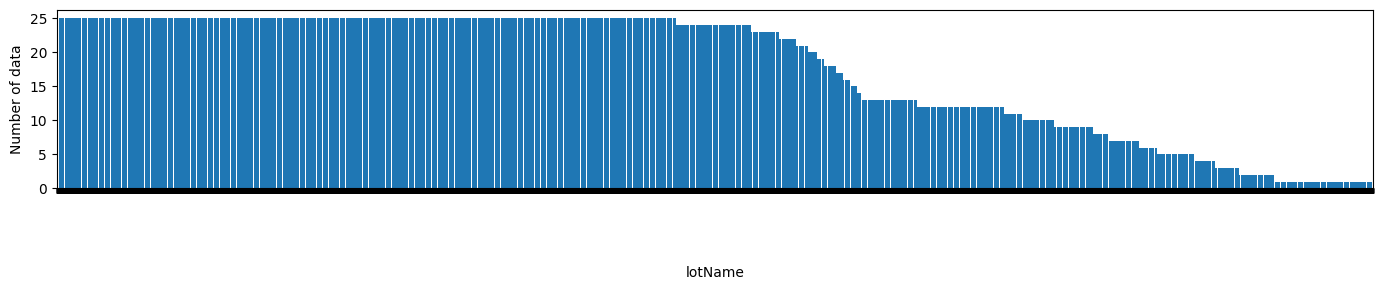

In [ ]:
# 로트번호 별 데이터의 개수
plt.figure(figsize=(14, 3))
df['lotName'].value_counts().plot(kind='bar', width=0.9)
plt.xlabel('lotName')
plt.ylabel('Number of data')
plt.xticks(color='none')
plt.tight_layout()
plt.show()

# 일부 로트에서 데이터가 누락되어 25개보다 적은 waferMap 수를 가지는 것을 확인할 수 있습니다.

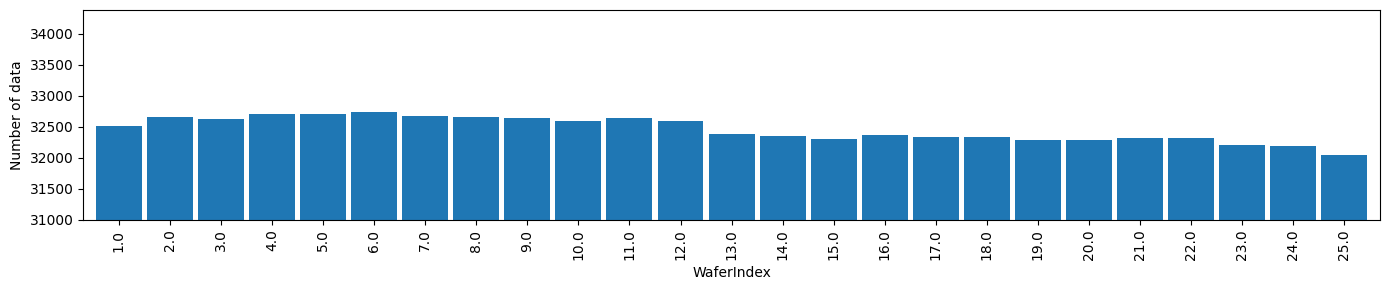

In [ ]:
# 웨이퍼 인덱스 별 데이터 개수
plt.figure(figsize=(14, 3))
df['waferIndex'].value_counts().sort_index().plot(kind='bar', width=0.9)
plt.xlabel('WaferIndex')
plt.ylabel('Number of data')
plt.ylim(31000) # 비교를 위해 y축 범위 축소
plt.tight_layout()
plt.show()

# waferIndex별 데이터 개수를 통해서도 누락이 발생한 것을 확인할 수 있습니다.

In [6]:
# waferIndex는 결함 분류에 필요가 없는 칼럼이기 때문에 제거합니다.
df = df.drop(columns='waferIndex')
df.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]]


In [7]:
# 웨이퍼 맵의 크기에 대한 칼럼을 추가합니다.
df['waferMapDim'] = df['waferMap'].apply(lambda x: x.shape)
df.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,[[Training]],[[none]],"(45, 48)"


In [8]:
# 웨이퍼 맵 크기는 632개의 종류가 있습니다
len(df['waferMapDim'].unique())

632

In [9]:
# trianTestLabel, failureType의 데이터 형태를 str로 바꿔주기 위한 함수를 선언합니다.
def getValue(inp):
  if isinstance(inp, np.ndarray):
      if len(inp) > 0:
          return getValue(inp[0])
      else:
          return 'none'
  else:
      return inp

In [10]:
df['trianTestLabel'] = df['trianTestLabel'].apply(lambda x: getValue(x))
df['failureType'] = df['failureType'].apply(lambda x: getValue(x))

df.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,none,"(45, 48)"


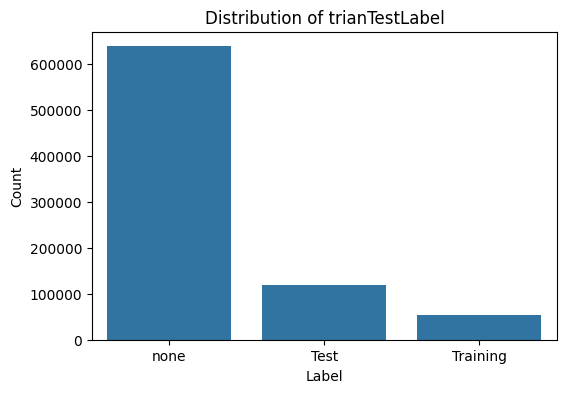

In [54]:
# 학습, 검증, 기타 데이터 분류 개수
plt.figure(figsize=(6, 4))
sns.barplot(x=df['trianTestLabel'].value_counts().index, 
            y=df['trianTestLabel'].value_counts().values)
plt.title('Distribution of trianTestLabel')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

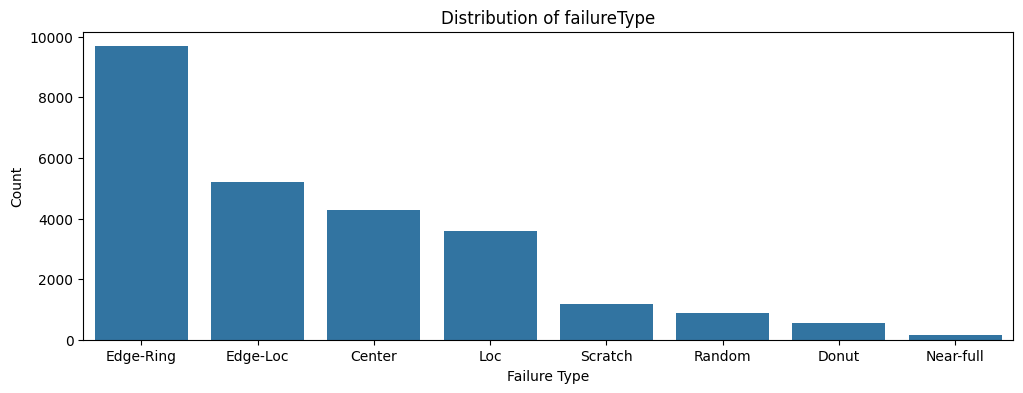

In [57]:
# 결함 종류에 따른 데이터 개수
failures = df.loc[df['failureType'] != 'none']

fails = failures['failureType']
plt.figure(figsize=(12, 4))
sns.barplot(x=fails.value_counts().index, 
            y=fails.value_counts().values)
plt.title('Distribution of failureType')
plt.xlabel('Failure Type')
plt.ylabel('Count')
plt.show()

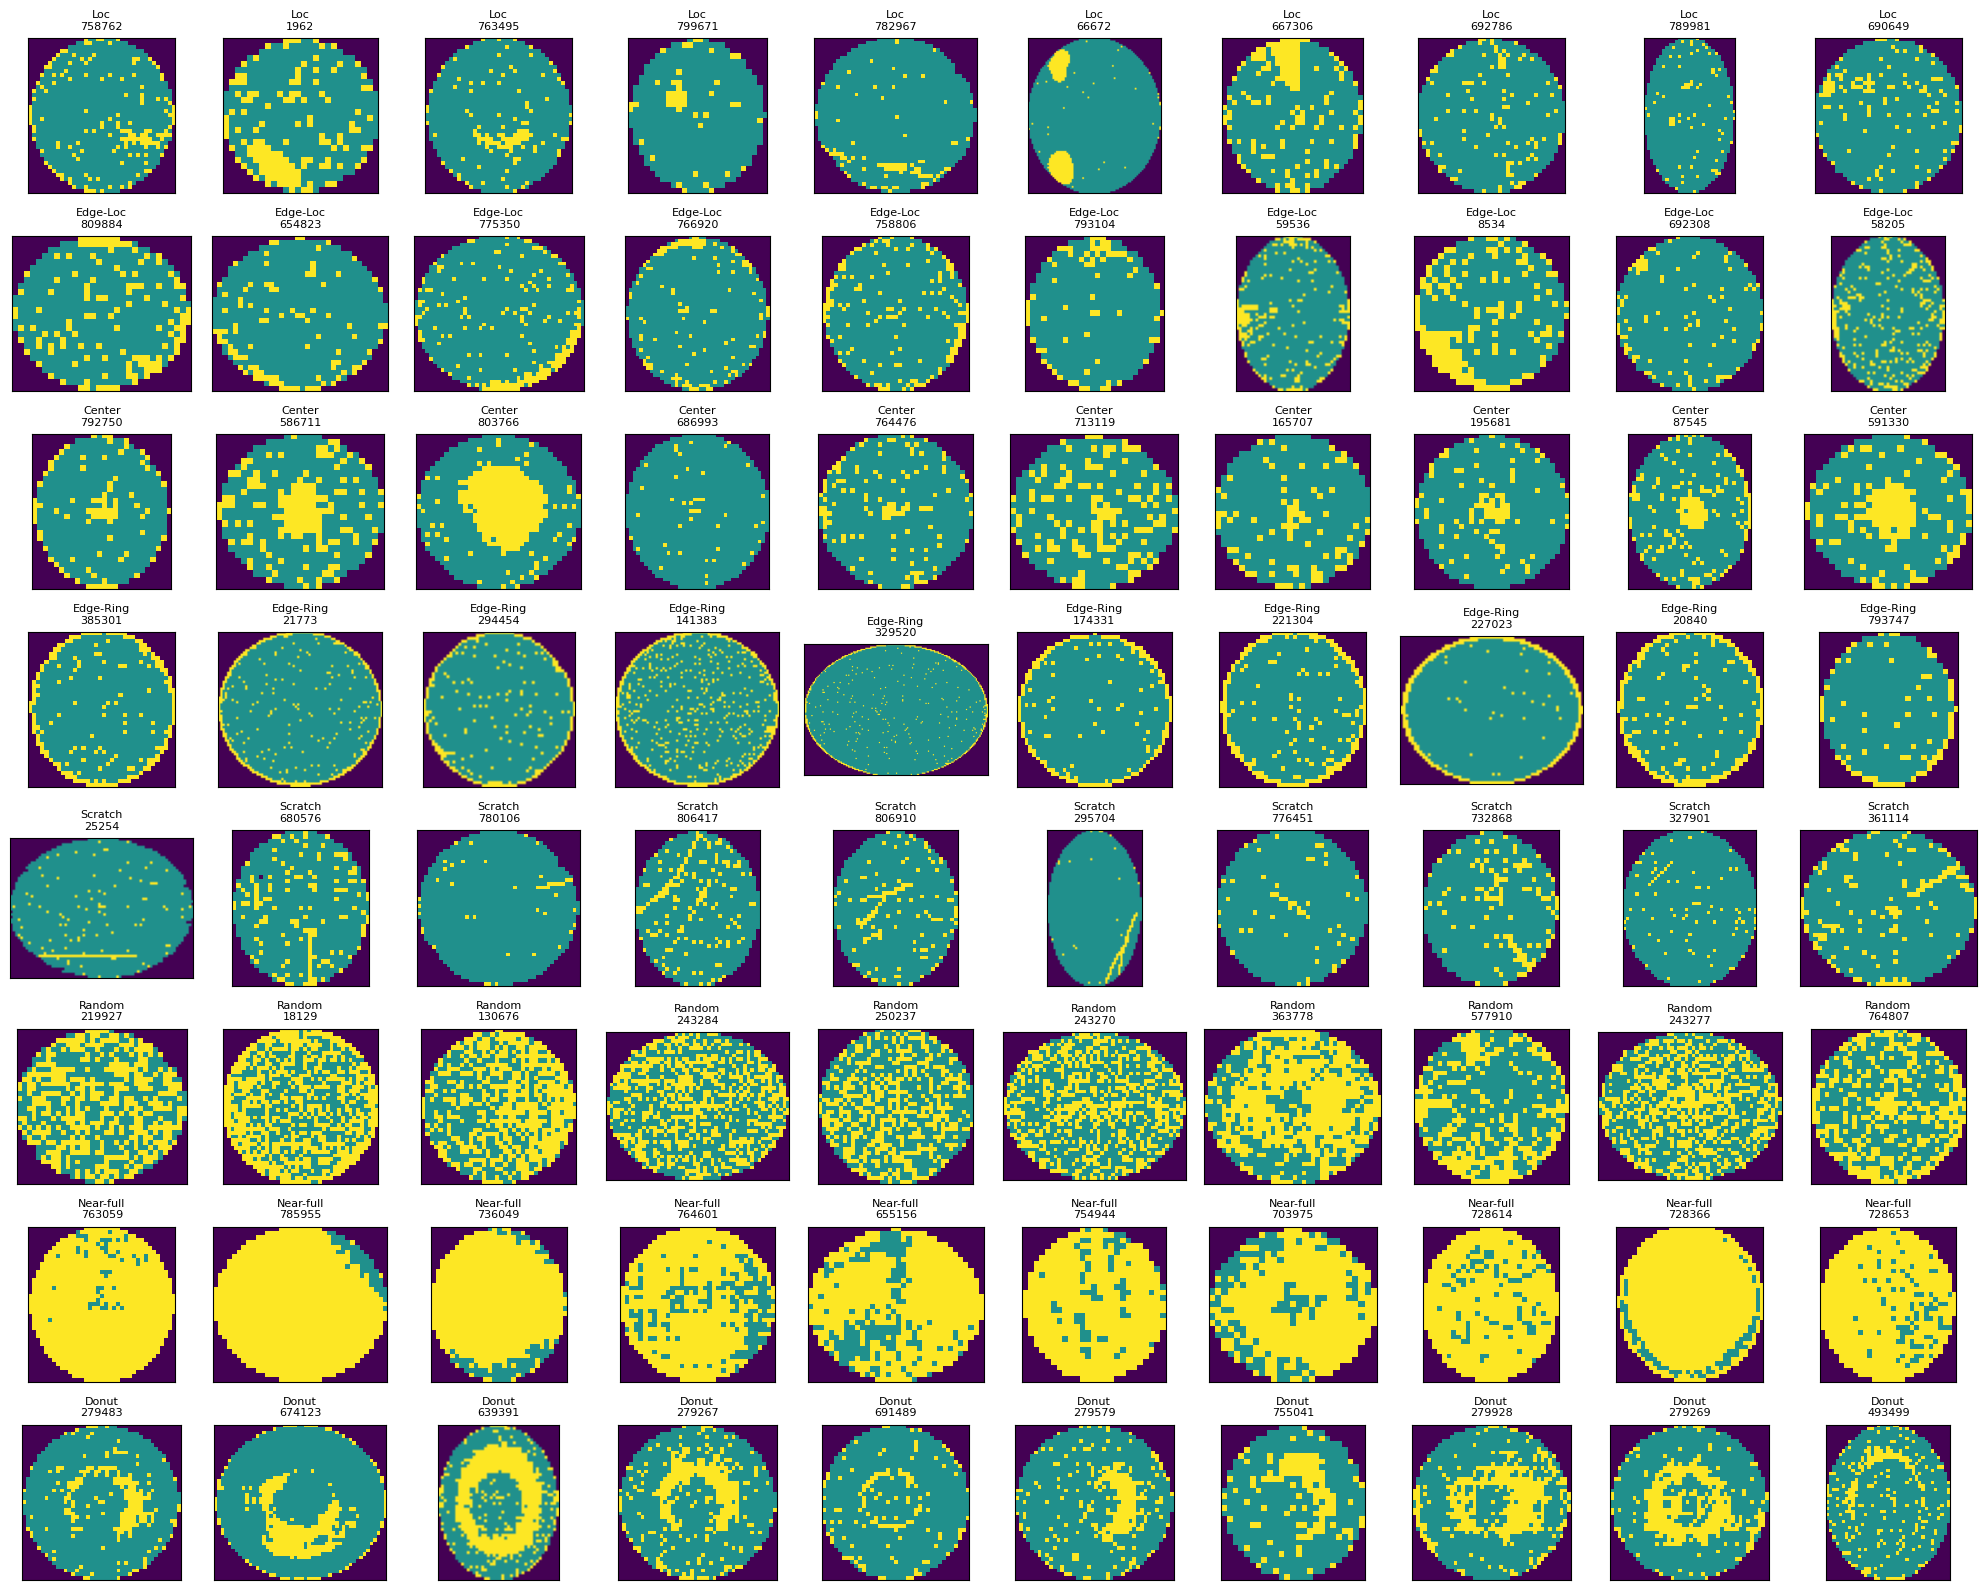

In [64]:
# 결함 종류에 따라 10개씩 웨이퍼 맵 시각화
failure_types = failures['failureType'].unique()
samples = {ftype: [] for ftype in failure_types}

for ftype in failure_types:
    type_failures = failures[failures['failureType'] == ftype]
    if len(type_failures) >= 10:
        samples[ftype] = type_failures.sample(10).index.tolist()
    else:
        samples[ftype] = type_failures.index.tolist()

fig, axes = plt.subplots(len(failure_types), 10, figsize=(20, 2*len(failure_types)))
for i, ftype in enumerate(failure_types):
    for j in range(10):
        if j < len(samples[ftype]):
            idx = samples[ftype][j]
            img = failures.loc[idx, 'waferMap']
            if isinstance(img, np.ndarray):
                axes[i, j].imshow(img, cmap='viridis')
                axes[i, j].set_title(f"{ftype}\n{idx}", fontsize=8)
            else:
                axes[i, j].axis('off')
        else:
            axes[i, j].axis('off')
        
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])

plt.tight_layout()
plt.show()

In [11]:
# 학습에 사용하기 위해 범주형 변수들을 인코딩해 줍니다.
from sklearn.preprocessing import LabelEncoder

en_fail = LabelEncoder()
df['failureType'] = en_fail.fit_transform(df['failureType'])

In [12]:
# waferMap을 numpy array로 변환합니다.
df['waferMap'] = df['waferMap'].apply(lambda x: np.array(x))
df.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)"
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)"
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)"
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)"
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)"


In [13]:
# waferMap은 동일한 크기를 가지고 있지 않습니다.
# 따라서 이 크기들을 통일시키는 과정이 필요합니다.
df['waferMapDim'].max(), df['waferMapDim'].min()

((300, 202), (6, 21))

In [ ]:
# 여러 방법이 있겠지만, 저는 패턴왜곡을 최소화하기 위해
# 가장 큰 웨이퍼 맵 크기에 맞춰 다른 웨이퍼 크기들을 확대하겠습니다.
import cv2
import gc

def resizing(originMap):
    maxRow = 300
    maxCol = 202
    
    # 원본 맵이 2D 배열이 아닌 경우 처리
    if len(originMap.shape) != 2:
        originMap = np.array(originMap)
    
    # 원본 맵의 크기가 이미 (300, 202)인 경우 그대로 반환
    if originMap.shape == (maxRow, maxCol):
        return originMap
    
    # 이미지 크기 조정
    resizedMap = cv2.resize(originMap, (maxCol, maxRow), interpolation=cv2.INTER_LINEAR)
    
    return resizedMap

# DataFrame의 'waferMap' 열에 resizing 함수 적용
gc.collect()
batch_size = 100
num_batches = len(df) // batch_size + 1

resized_maps = []
for i in range(num_batches):
    batch = df['waferMap'][i * batch_size: (i + 1) * batch_size]
    resized_batch = batch.apply(lambda x: resizing(x))
    resized_maps.extend(resized_batch)

df['resizedMap'] = resized_maps

In [15]:
df.head()

,waferMap,dieSize,lotName,trianTestLabel,failureType,waferMapDim,resizedMap
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,Training,8,"(45, 48)","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [16]:
# Train과 Test 데이터를 분리합니다.
# Train 데이터에 대해서는 불균형을 해소하기 위해 오버샘플링을 적용해 각 범주별 데이터를 8000개씩으로 제한합니다.
import gc
import numpy as np
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

gc.collect()

# 배치 크기 설정
batch_size = 200

balanced_dfs = []
for class_name in df['failureType'].unique():
    class_df = df[df['failureType'] == class_name]
    if len(class_df) > 8000:
        class_df = class_df.sample(n=8000, random_state=42)
    elif len(class_df) < 8000:
        class_df = resample(class_df, 
                            n_samples=8000, 
                            random_state=42, 
                            replace=True)
    balanced_dfs.append(class_df)

balanced_df = pd.concat(balanced_dfs)
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# 배치 처리를 위한 함수
def process_batch(batch_df):
    X_batch = np.stack(batch_df['resizedMap'].values)
    y_batch = batch_df['failureType'].values
    return X_batch, y_batch

# 배치 처리 및 저장
X_list, y_list = [], []
for i in range(0, len(balanced_df), batch_size):
    batch_df = balanced_df.iloc[i:i+batch_size]
    X_batch, y_batch = process_batch(batch_df)
    X_list.append(X_batch)
    y_list.append(y_batch)
    gc.collect()

X = np.concatenate(X_list)
y = np.concatenate(y_list)

# train과 test로 분할합니다 (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

del X, y, X_list, y_list
gc.collect()

print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Number of classes:", len(np.unique(y_train)))


Train set shape: (57600, 300, 202)
Test set shape: (14400, 300, 202)
Number of classes: 9


In [ ]:
# CNN 모델 선언

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
        
        # Convolutional Layers
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)

        # Pooling Layer
        self.pool = nn.MaxPool2d(2, 2)
        
        self.fc1 = nn.Linear(128 * 37 * 25, 512)
        self.fc2 = nn.Linear(512, num_classes)

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # Convolutional + Pooling + Activation + Dropout
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = self.pool(F.relu(self.conv3(x)))
        
        x = x.view(-1, 128 * 37 * 25) # 평탄화
        
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x


In [ ]:
# 데이터를 텐서로 변환합니다.
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.FloatTensor(X_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test).unsqueeze(1)

y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [19]:
# 모델, 손실 함수, 옵티마이저 설정
num_classes = 9
model = CNN(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [20]:
# 학습 함수
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()
    return running_loss / len(train_loader), 100. * correct / total

In [21]:
# 평가 함수
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
    return running_loss / len(test_loader), 100. * correct / total

In [22]:
# CUDA 동작 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model.to(device)

cuda


CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=118400, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=9, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)

In [23]:
# 학습 실행
num_epochs = 10
for epoch in range(num_epochs):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer, device)
    test_loss, test_acc = evaluate(model, test_loader, criterion, device)
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")
    print()

print("Training completed!")

Epoch 1/10
Train Loss: 0.8305, Train Acc: 69.57%
Test Loss: 0.4663, Test Acc: 83.13%

Epoch 2/10
Train Loss: 0.3992, Train Acc: 85.93%
Test Loss: 0.2563, Test Acc: 91.97%

Epoch 3/10
Train Loss: 0.2782, Train Acc: 90.50%
Test Loss: 0.2012, Test Acc: 93.93%

Epoch 4/10
Train Loss: 0.2134, Train Acc: 93.01%
Test Loss: 0.1701, Test Acc: 95.12%

Epoch 5/10
Train Loss: 0.1700, Train Acc: 94.51%
Test Loss: 0.1404, Test Acc: 95.87%

Epoch 6/10
Train Loss: 0.1450, Train Acc: 95.30%
Test Loss: 0.1271, Test Acc: 96.41%

Epoch 7/10
Train Loss: 0.1217, Train Acc: 96.09%
Test Loss: 0.1256, Test Acc: 96.44%

Epoch 8/10
Train Loss: 0.1112, Train Acc: 96.54%
Test Loss: 0.1102, Test Acc: 96.90%

Epoch 9/10
Train Loss: 0.1008, Train Acc: 96.75%
Test Loss: 0.1164, Test Acc: 96.43%

Epoch 10/10
Train Loss: 0.0897, Train Acc: 97.09%
Test Loss: 0.1087, Test Acc: 97.12%

Training completed!


In [25]:
# 학습시킨 모델을 저장합니다
torch.save(model, 'CNN_01.pth')

In [38]:
# 모델 성능을 평가합니다.
model.eval()

y_pred = []
y_true = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        
        # CPU로 이동하고 numpy 배열로 변환
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

y_pred = np.array(y_pred)
y_true = np.array(y_true)

In [39]:
from sklearn.metrics import classification_report

# classification_report 출력
label_names = en_fail.classes_
print(classification_report(y_true, y_pred, target_names=label_names))

              precision    recall  f1-score   support

      Center       0.97      0.98      0.98      1600
       Donut       0.99      1.00      1.00      1600
    Edge-Loc       0.95      0.95      0.95      1600
   Edge-Ring       0.97      0.98      0.98      1600
         Loc       0.96      0.96      0.96      1600
   Near-full       0.99      1.00      1.00      1600
      Random       0.99      1.00      1.00      1600
     Scratch       0.96      1.00      0.98      1600
        none       0.94      0.87      0.91      1600

    accuracy                           0.97     14400
   macro avg       0.97      0.97      0.97     14400
weighted avg       0.97      0.97      0.97     14400



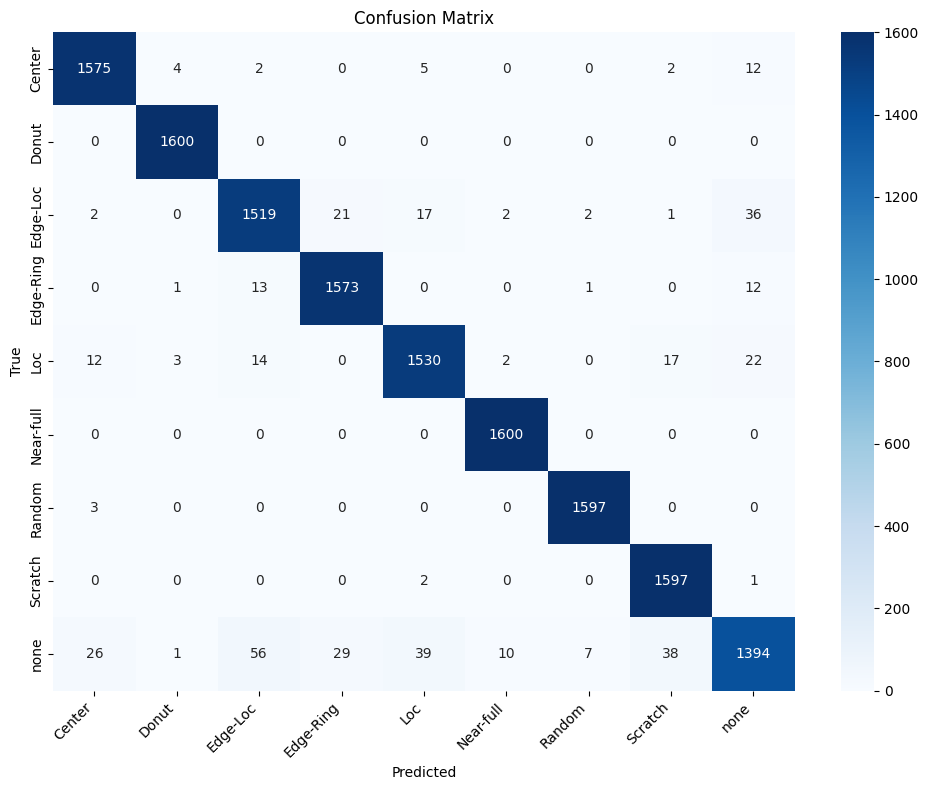

In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()